In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from skimage.io import imread, imshow
from skimage.transform import resize

import tensorflow as tf
from tensorflow.python.keras.backend import set_session
from tensorflow.keras import layers, Model

import os
import random
import numpy as np

from tqdm import tqdm

from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

2025-03-17 13:39:41.007941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-17 13:39:41.018892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-17 13:39:41.022163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 13:39:41.030622: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow.keras'

In [3]:
## Variaveis
seeds = [13, 42, 1,83,76]
np.random.seed(0)
num_classes = 1
split_size = 0.2
k = 5
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1
NUM_TEST_IMAGES = 10


# Definindo o caminho da pasta
imagens = 'Imagens1/'
mascara = 'mascaras1/'

# Listando todos os arquivos na pasta
imagens_lista = os.listdir(imagens)
mascaras_lista = os.listdir(mascara)

# Inicializando listas para cada coluna
imagens_id = []
mascara_id = []


In [4]:
# Loop pelos arquivos e preenchendo as listas com informações da pasta de imagens:
for arquivo in imagens_lista:
    # Nome e extensão do arquivo
    imagens_id.append(arquivo)

# Criando o DataFrame das imagens
df_img = pd.DataFrame({
    'Imagens_id': imagens_id
})

# Loop pelos arquivos e preenchendo as listas com informações da pasta de mascaras:
for arquivo in mascaras_lista:
    # Nome e extensão do arquivo
    mascara_id.append(arquivo)

# Criando o DataFrame das mascaras
df_msk = pd.DataFrame({
    'mascaras_id': mascara_id
})

In [5]:
print(df_img.head(10))
print(df_img.shape)

print(df_msk.head(10))
print(df_msk.shape)

                          Imagens_id
0  SIMCEPImages_A01_C1_F1_s01_w1.TIF
1  SIMCEPImages_A01_C1_F1_s01_w2.TIF
2  SIMCEPImages_A01_C1_F1_s02_w1.TIF
3  SIMCEPImages_A01_C1_F1_s02_w2.TIF
4  SIMCEPImages_A01_C1_F1_s03_w1.TIF
5  SIMCEPImages_A01_C1_F1_s03_w2.TIF
6  SIMCEPImages_A01_C1_F1_s04_w1.TIF
7  SIMCEPImages_A01_C1_F1_s04_w2.TIF
8  SIMCEPImages_A01_C1_F1_s05_w1.TIF
9  SIMCEPImages_A01_C1_F1_s05_w2.TIF
(100, 1)
                         mascaras_id
0  SIMCEPImages_A01_C1_F1_s01_w1.TIF
1  SIMCEPImages_A01_C1_F1_s01_w2.TIF
2  SIMCEPImages_A01_C1_F1_s02_w1.TIF
3  SIMCEPImages_A01_C1_F1_s02_w2.TIF
4  SIMCEPImages_A01_C1_F1_s03_w1.TIF
5  SIMCEPImages_A01_C1_F1_s03_w2.TIF
6  SIMCEPImages_A01_C1_F1_s04_w1.TIF
7  SIMCEPImages_A01_C1_F1_s04_w2.TIF
8  SIMCEPImages_A01_C1_F1_s05_w1.TIF
9  SIMCEPImages_A01_C1_F1_s05_w2.TIF
(100, 1)


In [6]:
# Get lists of images and their masks.

image_id_list = list(df_img['Imagens_id'])
mask_id_list = list(df_msk['mascaras_id'])

# Create empty arrays

X = np.zeros((len(image_id_list), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

y = np.zeros((len(mask_id_list), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

X_test = np.zeros((NUM_TEST_IMAGES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [7]:
# X imagens

for i, imagens_id in enumerate(image_id_list):

    path_image = 'Imagens1/' + imagens_id

    # read the image using skimage
    image = imread(path_image)

    # resize the image
    image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

    # use np.expand dims to add a channel axis so the shape becomes (IMG_HEIGHT, IMG_WIDTH, 1)
    image = np.expand_dims(image, axis=-1)

    # insert the image into X_train
    X[i] = image

print(X.shape)

(100, 128, 128, 1)


In [8]:
# Y classes (mascras)


for i, mascara_id in enumerate(mask_id_list):

    path_mask = 'mascaras1/' + mascara_id

    # read the image using skimage
    mask = imread(path_mask)
    mask = (mask >= 250)

    # resize the image
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

    # use np.expand dims to add a channel axis so the shape becomes (IMG_HEIGHT, IMG_WIDTH, 1)
    mask = np.expand_dims(mask, axis=-1)

    # insert the image into Y_Train
    y[i] = mask

print(y.shape)

(100, 128, 128, 1)


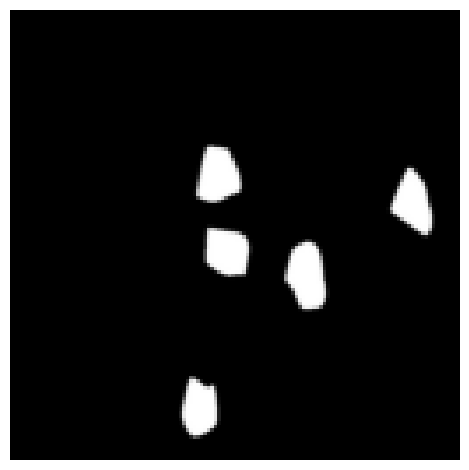

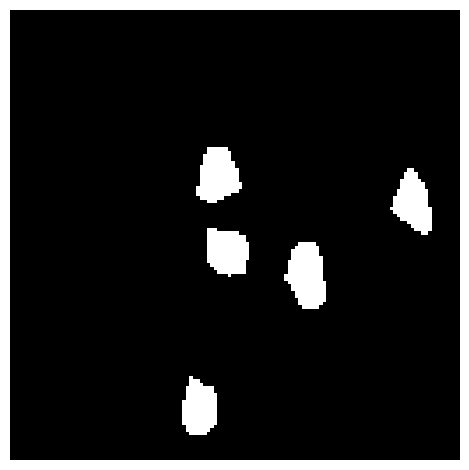

In [9]:
# Sample image and Ground-Truth Label from dataset

image_x = random.randint(0, len(X))
plt.axis("off")
imshow(X[image_x])
plt.show()
plt.axis("off")
imshow(np.squeeze(y[image_x]))
plt.show()

In [10]:
from keras_unet_collection import models


In [11]:
acc = []
jacc = []
f1 = []
prec = []
rec = []

for f in range(1, len(seeds)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_size, random_state=seeds[f])

    # Convert y_train and y_val to dictionaries to match the model's output format
    y_train = {
        'unet3plus_output_sup0_activation': y_train,
        'unet3plus_output_sup1_activation': y_train,
        'unet3plus_output_sup2_activation': y_train,
        'unet3plus_output_final_activation': y_train
    }
    y_val = {
        'unet3plus_output_sup0_activation': y_val,
        'unet3plus_output_sup1_activation': y_val,
        'unet3plus_output_sup2_activation': y_val,
        'unet3plus_output_final_activation': y_val
    }


    model = models.unet_3plus_2d((128, 128, 1), n_labels=1, filter_num_down=[64, 128, 256, 512],
                             filter_num_skip='auto', filter_num_aggregate='auto',
                             stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid',
                             batch_norm=True, pool='max', unpool=False, deep_supervision=True, name='unet3plus')

    # Compile o modelo e especifique as métricas para cada saída, se necessário

    model.compile(
        optimizer='adam',
        loss={
            'unet3plus_output_sup0_activation': 'binary_crossentropy',
            'unet3plus_output_sup1_activation': 'binary_crossentropy',
            'unet3plus_output_sup2_activation': 'binary_crossentropy',
            'unet3plus_output_final_activation': 'binary_crossentropy'
        },
        metrics={'unet3plus_output_final_activation': ['accuracy', tf.keras.metrics.Recall(name='recall')]}
    )


    checkpoint_filepath = 'model1_' + str(f+1)+'fold.keras'
    callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_filepath,
                save_weights_only=False,
                monitor='val_recall',
                mode='max',
                save_best_only=True,
                verbose=1)]

    model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=16, epochs=5, callbacks=callbacks)

    for i in range(0, len(X_val)):
        sample_image = X_val[i]
        sample_mask = y_val['unet3plus_output_final_activation'][i].astype(np.uint8).flatten()
        prediction = model.predict(sample_image[tf.newaxis, ...],verbose=0)[0]
        predicted_mask = (prediction > 0.5).astype(np.uint8).flatten()

        acc.append(accuracy_score(sample_mask, predicted_mask))
        jacc.append(jaccard_score(sample_mask, predicted_mask))
        f1.append(f1_score(sample_mask, predicted_mask))
        prec.append(precision_score(sample_mask, predicted_mask))
        rec.append(recall_score(sample_mask, predicted_mask))

    del model


Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [64, 64, 64]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 256


2024-11-04 13:46:54.510731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-04 13:46:54.678850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-04 13:46:54.678919: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-04 13:46:54.682237: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-04 13:46:54.682299: I external/local_xla/xla/stream_executor

----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/5


I0000 00:00:1730738823.724045  326860 service.cc:145] XLA service 0x4f216cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730738823.724085  326860 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-11-04 13:47:03.998119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 13:47:07.954838: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-11-04 13:47:17.864483: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 25.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-04 13:47:27.680287: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Alloc

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.6369 - unet3plus_output_final_activation_accuracy: 0.6187 - unet3plus_output_final_activation_recall: 0.6536

2024-11-04 13:47:36.267658: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-04 13:47:37.291775: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 24.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 2.5802 - unet3plus_output_final_activation_accuracy: 0.6516 - unet3plus_output_final_activation_recall: 0.6554 - val_loss: 3.2792 - val_unet3plus_output_final_activation_accuracy: 0.9505 - val_unet3plus_output_final_activation_recall: 0.9995
Epoch 2/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.6363 - unet3plus_output_final_activation_accuracy: 0.9920 - unet3plus_output_final_activation_recall: 0.9932

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.5814 - unet3plus_output_final_activation_accuracy: 0.9940 - unet3plus_output_final_activation_recall: 0.8751 - val_loss: 3.0655 - val_unet3plus_output_final_activation_accuracy: 0.9590 - val_unet3plus_output_final_activation_recall: 0.9989
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.4528 - unet3plus_output_final_activation_accuracy: 0.9971 - unet3plus_output_final_activation_recall: 0.9243 - val_loss: 4.5456 - val_unet3plus_output_final_activation_accuracy: 0.9729 - val_unet3plus_output_final_activation_recall: 0.9879
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.4073 - unet3plus_output_final_activation_accuracy: 0.9977 - unet3plus_output_final_activation_recall: 0.9210 - val_loss: 4.6915 - val_unet3plus_output_final_activation_accuracy: 0.9852 - val_unet3plus_output_final_activation_recall: 0.9868
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 1.3809 - unet3plus_output_final_activation_accuracy: 0.9

2024-11-04 13:47:42.269459: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.13GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-04 13:47:42.734901: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 24.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [64, 64, 64]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 256
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 499ms/step - loss: 2.6749 - unet3plus_output_final_activation_accuracy: 0.9357 - unet3plus_output_final_activation_recall: 0.4708 - val_loss: 4.2736 - val_unet3plus_output_final_activation_accuracy: 0.9644 - val_unet3plus_output_final_activation_recall: 0.9241
Epoch 2/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 2.0700 - unet3plus_output_final_activation_accuracy: 0.9905 - unet

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2.0509 - unet3plus_output_final_activation_accuracy: 0.9925 - unet3plus_output_final_activation_recall: 0.7657 - val_loss: 12.4431 - val_unet3plus_output_final_activation_accuracy: 0.7460 - val_unet3plus_output_final_activation_recall: 0.9935
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 2.0093 - unet3plus_output_final_activation_accuracy: 0.9963 - unet3plus_output_final_activation_recall: 0.8179 - val_loss: 11.7511 - val_unet3plus_output_final_activation_accuracy: 0.6505 - val_unet3plus_output_final_activation_recall: 0.9977
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.9914 - unet3plus_output_final_activation_accuracy: 0.9974 - unet3plus_output_final_activation_recall: 0.9188 - val_loss: 20.4937 - val_unet3plus_output_final_activation_accuracy: 0.6306 - val_unet3plus_output_final_activation_recall: 0.9954
Automated hyper-parameter determination is applied with the following details:
----------
	Number of convoluti

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2.0886 - unet3plus_output_final_activation_accuracy: 0.9949 - unet3plus_output_final_activation_recall: 0.7468 - val_loss: 3.8632 - val_unet3plus_output_final_activation_accuracy: 0.9787 - val_unet3plus_output_final_activation_recall: 0.2425
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 2.0361 - unet3plus_output_final_activation_accuracy: 0.9964 - unet3plus_output_final_activation_recall: 0.8376 - val_loss: 3.5679 - val_unet3plus_output_final_activation_accuracy: 0.9830 - val_unet3plus_output_final_activation_recall: 0.5606
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2.0149 - unet3plus_output_final_activation_accuracy: 0.9976 - unet3plus_output_final_activation_recall: 0.8898 - val_loss: 3.5063 - val_unet3plus_output_final_activation_accuracy: 0.9870 - val_unet3plus_output_final_activation_recall: 0.6096
Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution 

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 2.0980 - unet3plus_output_final_activation_accuracy: 0.9946 - unet3plus_output_final_activation_recall: 0.7797 - val_loss: 20.2217 - val_unet3plus_output_final_activation_accuracy: 0.5131 - val_unet3plus_output_final_activation_recall: 0.9989
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2.0045 - unet3plus_output_final_activation_accuracy: 0.9967 - unet3plus_output_final_activation_recall: 0.8946 - val_loss: 15.4754 - val_unet3plus_output_final_activation_accuracy: 0.5899 - val_unet3plus_output_final_activation_recall: 0.9959
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.9803 - unet3plus_output_final_activation_accuracy: 0.9962 - unet3plus_output_final_activation_recall: 0.9501 - val_loss: 5.3000 - val_unet3plus_output_final_activation_accuracy: 0.9482 - val_unet3plus_output_final_activation_recall: 0.9838
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.9617 - unet3plus_output_final_activation_accuracy: 0